In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [12]:
Path('../scripts/output/regressed_exps')

True

In [15]:
evaluations = {
    'CoinFlipGoal': {
        'true': Path('../scripts/output/regressed_exps/ppo/EmptyMaze-10x10-CoinFlipGoal-v3_1/evaluations.npz'),
        'rm': Path('../scripts/output/regressed_exps/ppo/EmptyMaze-10x10-CoinFlipGoal-v3_2/evaluations.npz')
    },
    'TwoGoals': {
        'true': Path('../scripts/output/regressed_exps/ppo/EmptyMaze-10x10-TwoGoals-v3_1/evaluations.npz'),
        'rm': Path('../scripts/output/regressed_exps/ppo/EmptyMaze-10x10-TwoGoals-v3_2/evaluations.npz')
    }
}


In [53]:
plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
    "font.serif": ["Times"],
})

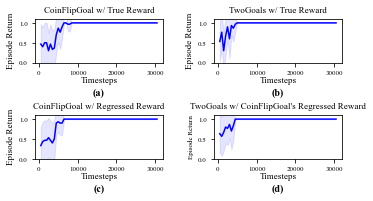

In [73]:
plt.figure(figsize=(5.5, 2.7))

ax = plt.subplot(2, 2, 1)
with np.load(evaluations['CoinFlipGoal']['true']) as data:
    timesteps = data['timesteps']
    results = data['results']
means = np.mean(results, axis=1).flatten()
stds = np.std(results, axis=1).flatten()
ax.plot(timesteps, means, color="blue")
ax.fill_between(timesteps, means-stds, means+stds, alpha=0.1, color="blue")
# plt.ylim(-5, 40)
ax.set_xlabel("Timesteps", fontsize=9, fontfamily='Times New Roman')
ax.set_ylabel("Episode Return", fontsize=9, fontfamily='Times New Roman')
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=7, fontfamily='Times New Roman')
plt.yticks(fontsize=7, fontfamily='Times New Roman')
plt.yticks([0, 0.5, 1], fontsize=7, fontfamily='Times New Roman')
ax.xaxis.labelpad=1
# plt.legend(loc='upper left', prop={'size': 6})
ax.set_title("CoinFlipGoal w/ True Reward", fontsize=9, fontfamily='Times New Roman')
ax.text(0.5, -0.75, "(a)", size=10, ha="center", weight="bold", fontfamily='Times New Roman', 
         transform=ax.transAxes)

ax = plt.subplot(2, 2, 3)
with np.load(evaluations['CoinFlipGoal']['rm']) as data:
    timesteps = data['timesteps']
    results = data['results']
means = np.mean(results, axis=1).flatten()
stds = np.std(results, axis=1).flatten()
ax.plot(timesteps, means, color="blue")
ax.fill_between(timesteps, means-stds, means+stds, alpha=0.1, color="blue")
# plt.ylim(-5, 40)
ax.set_xlabel("Timesteps", fontsize=9, fontfamily='Times New Roman')
ax.set_ylabel("Episode Return", fontsize=9, fontfamily='Times New Roman')
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=7, fontfamily='Times New Roman')
plt.yticks([0, 0.5, 1], fontsize=7, fontfamily='Times New Roman')
ax.xaxis.labelpad=1
# plt.legend(loc='upper left', prop={'size': 6})
ax.set_title("CoinFlipGoal w/ Regressed Reward", fontsize=9, fontfamily='Times New Roman')
ax.text(0.5, -0.75, "(c)", size=10, ha="center", weight="bold", fontfamily='Times New Roman', 
         transform=ax.transAxes)

ax = plt.subplot(2, 2, 2)
with np.load(evaluations['TwoGoals']['true']) as data:
    timesteps = data['timesteps']
    results = data['results']
means = np.mean(results, axis=1).flatten()
stds = np.std(results, axis=1).flatten()
ax.plot(timesteps, means, color="blue")
ax.fill_between(timesteps, means-stds, means+stds, alpha=0.1, color="blue")
# plt.ylim(-5, 40)
ax.set_xlabel("Timesteps", fontsize=9, fontfamily='Times New Roman')
ax.set_ylabel("Episode Return", fontsize=9, fontfamily='Times New Roman')
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=7, fontfamily='Times New Roman')
plt.yticks([0, 0.5, 1], fontsize=7, fontfamily='Times New Roman')
ax.xaxis.labelpad=1
# plt.legend(loc='upper left', prop={'size': 6})
ax.set_title("TwoGoals w/ True Reward", fontsize=9, fontfamily='Times New Roman')
ax.text(0.5, -0.75, "(b)", size=10, ha="center", weight="bold", fontfamily='Times New Roman', 
         transform=ax.transAxes)

ax = plt.subplot(2, 2, 4)
with np.load(evaluations['TwoGoals']['rm']) as data:
    timesteps = data['timesteps']
    results = data['results']
means = np.mean(results, axis=1).flatten()
stds = np.std(results, axis=1).flatten()
ax.plot(timesteps, means, color="blue")
ax.fill_between(timesteps, means-stds, means+stds, alpha=0.1, color="blue")
# plt.ylim(-5, 40)
ax.set_xlabel("Timesteps", fontsize=9, fontfamily='Times New Roman')
ax.set_ylabel("Episode Return", fontsize=7, fontfamily='Times New Roman')
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=7, fontfamily='Times New Roman')
plt.yticks([0, 0.5, 1], fontsize=7, fontfamily='Times New Roman')
ax.xaxis.labelpad=1
# plt.legend(loc='upper left', prop={'size': 6})
ax.set_title("TwoGoals w/ CoinFlipGoal's Regressed Reward", fontsize=9, fontfamily='Times New Roman')
ax.text(0.5, -0.75, "(d)", size=10, ha="center", weight="bold", fontfamily='Times New Roman', 
         transform=ax.transAxes)


plt.subplots_adjust(hspace=1.2, wspace=0.4, bottom=0.2, top=0.92)

plt.savefig('figures/maze-training-curves.pdf', dpi=100)